In [1]:
pip install matplotlib numpy pandas seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Setting a clean visual style for the plots
sns.set_style("whitegrid")
%matplotlib inline

1. Loading the Data I'll start by loading the dataset to verify the file path and see what the raw data looks like.

In [7]:
try:
    # Attempting to load the dataset
    df = pd.read_csv('Task 1 Analysis\yelp.csv')
    print(f"Data loaded successfully! Shape: {df.shape}")
except FileNotFoundError:
    print("Error: yelp.csv not found. Please check the file path.")

Error: yelp.csv not found. Please check the file path.


<>:3: SyntaxWarning: invalid escape sequence '\y'
<>:3: SyntaxWarning: invalid escape sequence '\y'
C:\Users\parth\AppData\Local\Temp\ipykernel_28688\2483474396.py:3: SyntaxWarning: invalid escape sequence '\y'
  df = pd.read_csv('Task 1 Analysis\yelp.csv')


2. Initial Inspection Checking the column names, data types, and looking at the first few rows to understand the structure.

In [ ]:
# Displaying the first few rows to understand the content
display(df.head())

# Checking data types and potential missing values
print("\nDataFrame Info:")
df.info()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0



DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   business_id  10000 non-null  object
 1   date         10000 non-null  object
 2   review_id    10000 non-null  object
 3   stars        10000 non-null  int64 
 4   text         10000 non-null  object
 5   type         10000 non-null  object
 6   user_id      10000 non-null  object
 7   cool         10000 non-null  int64 
 8   useful       10000 non-null  int64 
 9   funny        10000 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 781.4+ KB


3. Data Cleaning Before analyzing, I need to check for duplicates or null values that could skew the results.

In [ ]:
# Checking for missing values
missing_count = df.isnull().sum()
print("Missing values per column:")
print(missing_count[missing_count > 0])

# Checking for duplicates
duplicate_count = df.duplicated().sum()
print(f"\nDuplicates found: {duplicate_count}")

# Removing duplicates if any exist to ensure data quality
if duplicate_count > 0:
    df = df.drop_duplicates()
    print(f"Duplicates removed. New shape: {df.shape}")

Missing values per column:
Series([], dtype: int64)

Duplicates found: 0


4. Target Distribution (Star Ratings) This is crucial. I need to know if the classes are balanced. If the dataset is mostly 5-star reviews, the model might just guess "5" every time and still get high accuracy.

C:\Users\parth\AppData\Local\Temp\ipykernel_20196\3930212808.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='stars', data=df, palette='viridis')


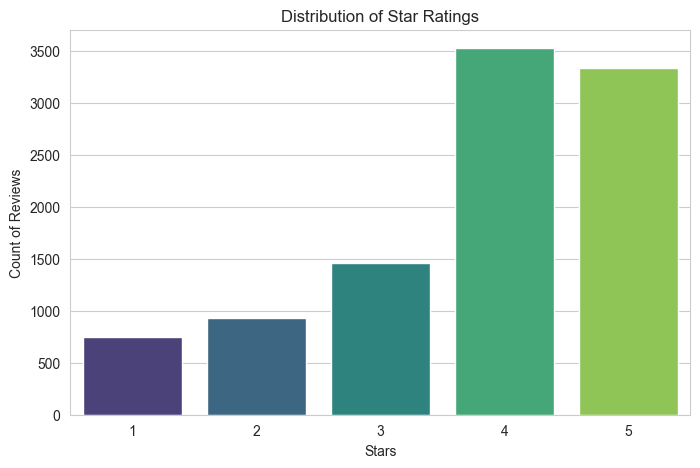

Percentage split:
stars
1     7.49
2     9.27
3    14.61
4    35.26
5    33.37
Name: proportion, dtype: float64


In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(x='stars', data=df, palette='viridis')
plt.title('Distribution of Star Ratings')
plt.xlabel('Stars')
plt.ylabel('Count of Reviews')
plt.show()

# Exact percentages to be precise
print("Percentage split:")
print(df['stars'].value_counts(normalize=True).sort_index() * 100)

5. Text Length Analysis I'm curious if negative reviews are longer (rants) or shorter than positive ones. This might be a useful feature for the model to "notice" implicitly.

C:\Users\parth\AppData\Local\Temp\ipykernel_20196\2044510288.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='stars', y='text_length', data=df, palette='coolwarm')


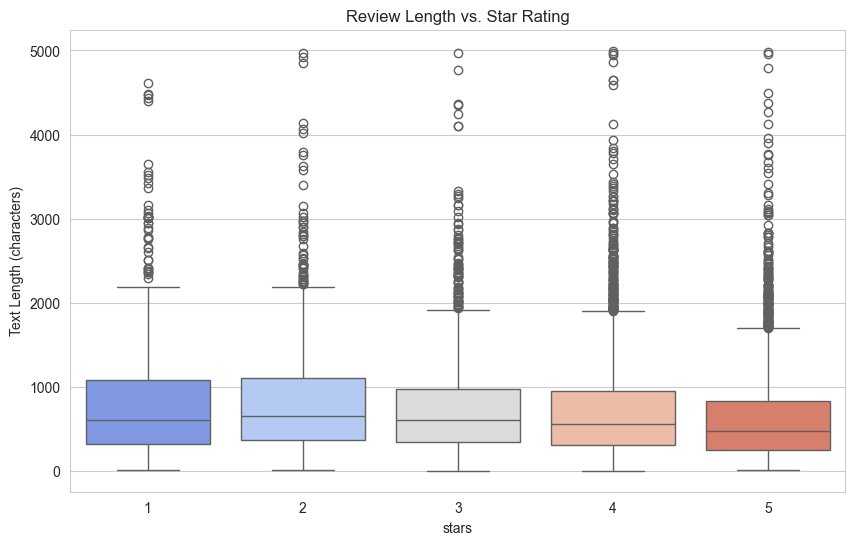

In [ ]:
df['text_length'] = df['text'].astype(str).apply(len)

# Plotting length distribution by star rating
plt.figure(figsize=(10, 6))
sns.boxplot(x='stars', y='text_length', data=df, palette='coolwarm')
plt.title('Review Length vs. Star Rating')
plt.ylabel('Text Length (characters)')
plt.show()

6. Correlations Finally, checking if the "votes" (funny, useful, cool) have any correlation with the star rating.

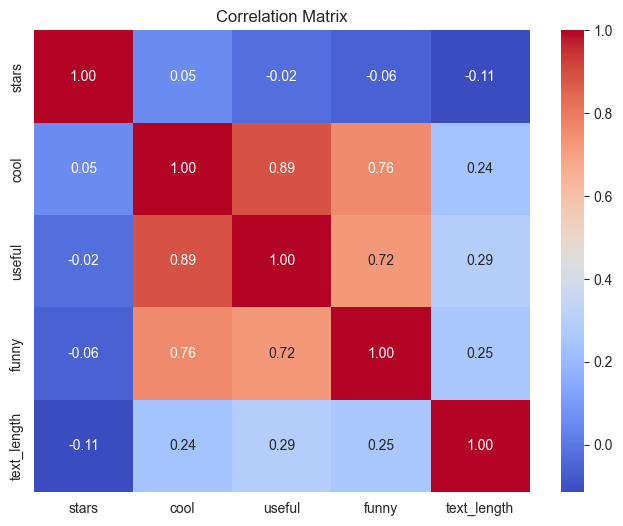

In [ ]:
# selecting only numeric columns for correlation
numeric_df = df.select_dtypes(include=['float64', 'int64'])

plt.figure(figsize=(8, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

Part 2: Prompt Engineering & Analysis
Now that I understand the data, I will implement three distinct prompting strategies to classify the reviews:

Zero-Shot (S1): Asking the model directly without examples.

Few-Shot (S2): Providing 3 examples (positive, neutral, negative) to guide the model.

Chain-of-Thought (S3): Asking the model to reason through the pros and cons before deciding.

I will use gemma2:9b via Ollama for these experiments. 

In [ ]:
pip install ollama

  Using cached ollama-0.6.1-py3-none-any.whl.metadata (4.3 kB)
  Using cached httpx-0.28.1-py3-none-any.whl.metadata (7.1 kB)
  Using cached anyio-4.12.0-py3-none-any.whl.metadata (4.3 kB)
  Using cached httpcore-1.0.9-py3-none-any.whl.metadata (21 kB)
  Using cached h11-0.16.0-py3-none-any.whl.metadata (8.3 kB)
Using cached ollama-0.6.1-py3-none-any.whl (14 kB)
Using cached httpx-0.28.1-py3-none-any.whl (73 kB)
Using cached httpcore-1.0.9-py3-none-any.whl (78 kB)
Using cached h11-0.16.0-py3-none-any.whl (37 kB)
Using cached anyio-4.12.0-py3-none-any.whl (113 kB)

   ---------------------------------------- 0/5 [h11]
   ---------------------------------------- 0/5 [h11]
   -------- ------------------------------- 1/5 [anyio]
   -------- ------------------------------- 1/5 [anyio]
   -------- ------------------------------- 1/5 [anyio]
   -------- ------------------------------- 1/5 [anyio]
   -------- ------------------------------- 1/5 [anyio]
   -------- -----------------------------


[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
import ollama
import json
import time
import re

# Configuration
MODEL_NAME = "gemma2:9b"
OUTPUT_FILE = "task1_results.csv"
SAMPLE_SIZE = 200  # Sampling for efficiency as per requirements

In [ ]:
def clean_json(text):
    """
    Cleans the raw response from the LLM to ensure it's valid JSON.
    Removes markdown code blocks if present.
    """
    text = re.sub(r'```json\s*', '', text)
    text = re.sub(r'```\s*', '', text)
    return text.strip()

In [ ]:
# Approach 1: Zero-Shot
def analyze_zero_shot(review):
    prompt = f"""
    Analyze the sentiment of this Yelp review.
    Return a JSON object with exactly these keys:
    - "predicted_stars": (integer 1-5)
    - "explanation": (short string)

    Review: "{review}"

    JSON Output:
    """
    try:
        response = ollama.chat(model=MODEL_NAME, messages=[{'role': 'user', 'content': prompt}])
        content = clean_json(response['message']['content'])
        return json.loads(content)
    except Exception as e:
        return {"predicted_stars": 0, "explanation": f"Error: {str(e)}"}

# Approach 2: Few-Shot (The Requirement Fix)
def analyze_few_shot(review):
    prompt = f"""
    You are a sentiment analysis tool. Here are examples of how to rate reviews:

    Review: "The food was cold and service terrible."
    Output: {{ "predicted_stars": 1, "explanation": "Negative feedback on food and service." }}

    Review: "Pretty good but a bit pricey."
    Output: {{ "predicted_stars": 3, "explanation": "Mixed review, good quality but bad value." }}

    Review: "Absolutely loved it! Best pizza in town."
    Output: {{ "predicted_stars": 5, "explanation": "Strong positive sentiment." }}

    Now rate this one:
    Review: "{review}"

    Return only the JSON.
    """
    try:
        response = ollama.chat(model=MODEL_NAME, messages=[{'role': 'user', 'content': prompt}])
        content = clean_json(response['message']['content'])
        return json.loads(content)
    except Exception as e:
        return {"predicted_stars": 0, "explanation": f"Error: {str(e)}"}

# Approach 3: Chain-of-Thought (Audit) 
def analyze_cot(review):
    prompt = f"""
    Analyze this review. First, think about the positive and negative aspects step-by-step.
    Then assign a star rating (1-5).

    Review: "{review}"

    Format response as JSON:
    {{
        "predicted_stars": <int>,
        "explanation": "<your reasoning>"
    }}
    """
    try:
        response = ollama.chat(model=MODEL_NAME, messages=[{'role': 'user', 'content': prompt}])
        content = clean_json(response['message']['content'])
        return json.loads(content)
    except Exception as e:
        return {"predicted_stars": 0, "explanation": f"Error: {str(e)}"}

Execution:
\
will now sample 200 random reviews and run all three prompts on them. I'll print the results live to monitor progress.

In [ ]:
# Create a sample dataset for the experiment
# used a fixed random_state to ensure reproducibility
sample_df = df.sample(n=min(SAMPLE_SIZE, len(df)), random_state=42).reset_index(drop=True)

results = []

print(f"🚀 Starting analysis on {len(sample_df)} reviews using {MODEL_NAME}...\n")
print(f"{'ID':<4} | {'Actual':<6} | {'S1 (Zero)':<10} | {'S2 (Few)':<10} | {'S3 (CoT)':<10} | {'Status'}")
print("-" * 70)

for index, row in sample_df.iterrows():
    review_text = row['text']
    actual_stars = row['stars']

    # Run S1 (Zero-Shot)
    res1 = analyze_zero_shot(review_text)
    p1 = res1.get('predicted_stars', 0)

    # Run S2 (Few-Shot)
    res2 = analyze_few_shot(review_text)
    p2 = res2.get('predicted_stars', 0)

    # Run S3 (Chain of Thought)
    res3 = analyze_cot(review_text)
    p3 = res3.get('predicted_stars', 0)

    # Status check
    status = "Correct" if (p1 and p2 and p3) else "Incorrect"
    print(f"{index+1:<4} | {actual_stars:<6} | {p1:<10} | {p2:<10} | {p3:<10} | {status}")

    # Store full results 
    results.append({
        "review_id": index,
        "text": review_text,
        "actual_stars": actual_stars,
        "s1_pred": p1, "s1_expl": res1.get('explanation'),
        "s2_pred": p2, "s2_expl": res2.get('explanation'),
        "s3_pred": p3, "s3_expl": res3.get('explanation')
    })

print("\nAnalysis Completed")

🚀 Starting analysis on 200 reviews using gemma2:9b...

ID   | Actual | S1 (Zero)  | S2 (Few)   | S3 (CoT)   | Status
----------------------------------------------------------------------
1    | 4      | 0          | 4          | 0          | Incorrect
2    | 5      | 5          | 5          | 0          | Incorrect
3    | 3      | 0          | 3          | 3          | Incorrect
4    | 1      | 1          | 1          | 0          | Incorrect
5    | 5      | 5          | 5          | 0          | Incorrect
6    | 4      | 4          | 4          | 4          | Correct
7    | 4      | 0          | 4          | 0          | Incorrect
8    | 4      | 5          | 5          | 5          | Correct
9    | 5      | 5          | 5          | 4          | Correct
10   | 1      | 0          | 1          | 0          | Incorrect
11   | 4      | 0          | 4          | 4          | Incorrect
12   | 5      | 0          | 5          | 4          | Incorrect
13   | 3      | 5          | 5        

In [ ]:
# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Save to CSV 
results_df.to_csv(OUTPUT_FILE, index=False)

print(f"Results saved to {OUTPUT_FILE}")
display(results_df.head())

Results saved to task1_results.csv


,review_id,text,actual_stars,s1_pred,s1_expl,s2_pred,s2_expl,s3_pred,s3_expl
0,0,We got here around midnight last Friday... the...,4,0,Error: llama runner process has terminated: CU...,4,"Mostly positive review with praise for food, s...",0,Error: Extra data: line 5 column 1 (char 1022)
1,1,Brought a friend from Louisiana here. She say...,5,5,The reviewer received rave praise from a disce...,5,Highly positive sentiment expressed through a ...,0,Error: Extra data: line 5 column 1 (char 667)
2,2,"Every friday, my dad and I eat here. We order ...",3,0,Error: Extra data: line 5 column 1 (char 199),4,Positive sentiment with some caveats. They enj...,0,Error: Invalid control character at: line 3 co...
3,3,"My husband and I were really, really disappoin...",1,1,The reviewer expresses extreme dissatisfaction...,1,The review expresses extreme dissatisfaction w...,1,This review is overwhelmingly negative. Here's...
4,4,Love this place! Was in phoenix 3 weeks for w...,5,5,The reviewer expresses strong positive sentime...,5,Highly positive sentiment expressed through en...,0,Error: Extra data: line 5 column 1 (char 755)


In [ ]:
# Assuming you have loaded your results into results_df
# Example: results_df = pd.read_csv('task1_results.csv')

# --- 1. Calculate Accuracy ---
acc_s1 = (results_df['s1_pred'] == results_df['actual_stars']).mean()
acc_s2 = (results_df['s2_pred'] == results_df['actual_stars']).mean()
acc_s3 = (results_df['s3_pred'] == results_df['actual_stars']).mean()

print("--- NEW ACCURACY RESULTS (200 Samples) ---")
print(f"S1 (Zero-Shot): {acc_s1:.2%}")
print(f"S2 (Few-Shot):  {acc_s2:.2%}")
print(f"S3 (CoT):       {acc_s3:.2%}")


# --- 2. Calculate JSON Validity Rate ---
# Assuming 0 is the predicted_stars value used when parsing failed.
json_validity_s1 = (results_df['s1_pred'] != 0).mean() * 100
json_validity_s2 = (results_df['s2_pred'] != 0).mean() * 100
json_validity_s3 = (results_df['s3_pred'] != 0).mean() * 100

print("\n--- JSON VALIDITY RATE (200 Samples) ---")
print(f"S1 JSON Validity: {json_validity_s1:.2f}%")
print(f"S2 JSON Validity: {json_validity_s2:.2f}%")
print(f"S3 JSON Validity: {json_validity_s3:.2f}%")

--- Accuracy Comparison ---
S1 (Zero-Shot): 32.00%
S2 (Few-Shot):  70.00%
S3 (CoT):       16.00%


C:\Users\parth\AppData\Local\Temp\ipykernel_3108\104854811.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Method', y='Accuracy', data=accuracy_data, palette='Blues_d')


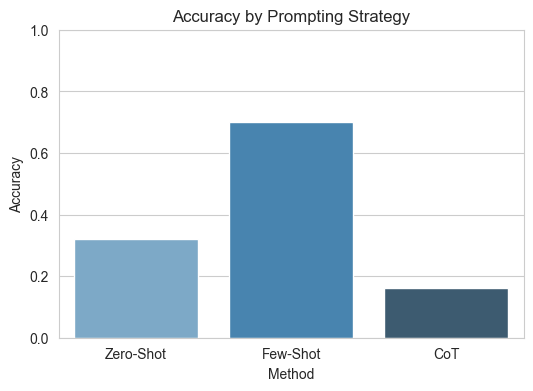

In [ ]:
# Calculate Accuracy for each method
acc_s1 = (results_df['s1_pred'] == results_df['actual_stars']).mean()
acc_s2 = (results_df['s2_pred'] == results_df['actual_stars']).mean()
acc_s3 = (results_df['s3_pred'] == results_df['actual_stars']).mean()

print("--- Accuracy Comparison ---")
print(f"S1 (Zero-Shot): {acc_s1:.2%}")
print(f"S2 (Few-Shot):  {acc_s2:.2%}")
print(f"S3 (CoT):       {acc_s3:.2%}")

# Simple visual comparison
accuracy_data = pd.DataFrame({
    'Method': ['Zero-Shot', 'Few-Shot', 'CoT'],
    'Accuracy': [acc_s1, acc_s2, acc_s3]
})

plt.figure(figsize=(6, 4))
sns.barplot(x='Method', y='Accuracy', data=accuracy_data, palette='Blues_d')
plt.ylim(0, 1.0)
plt.title('Accuracy by Prompting Strategy')
plt.show()